## load data

https://www.kaggle.com/datasets/oddrationale/mnist-in-csv

In [2]:
import pandas as pd

df_train = pd.read_csv('data/mnist_train.csv')
print(df_train.shape)
df_train.head()

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y_train = df_train['label'].to_numpy()
X_train = df_train.drop(columns=['label']).to_numpy()

## visualization utils

In [4]:
%config InlineBackend.figure_format = 'svg'

In [5]:
def minmax(x):
    return (x - x.min()) / (x.max() - x.min())

In [6]:
import matplotlib.pyplot as plt
import cv2

def show(row, ax=None):
    if (row < 0).any():
        row = minmax(row) * 255
    img = row.reshape(28, 28).astype('uint8')
    img = cv2.resize(
        img,
        dsize=(400,400),
        interpolation=cv2.INTER_LANCZOS4
    )
    if ax is not None:
        plt = ax
    plt.imshow(img, cmap='viridis')
    plt.axis('off')

## pca

In [7]:
ids = [1,3,5,7,2,0,13,15,17, 4]
subsample = X_train[ids]

In [8]:
from src import PCA

n_components_list = [3, 10, 30, 100, 300]

autoencoded = []
eig_vects = []
for n_components in n_components_list:
    pca = PCA(n_components=n_components)
    autoencoded.append(pca.fit(X_train).auto_encode(subsample))
    eig_vects.append(pca.eig_vects)

## results

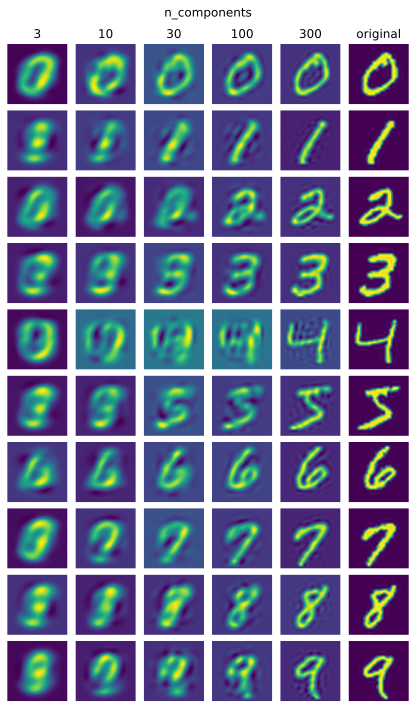

In [10]:
nrows = len(ids)
ncols = len(n_components_list) + 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols, nrows))

for i in range(nrows):
    for j in range(ncols-1):
        show(autoencoded[j][i], ax[i, j])

for i in range(nrows):
    show(subsample[i], ax[i, -1])

n_components_lst = n_components_list + ['original']
for j in range(ncols):
    ax[0, j].set_title(f'{n_components_lst[j]}')
fig.suptitle('n_components')

fig.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0.1)

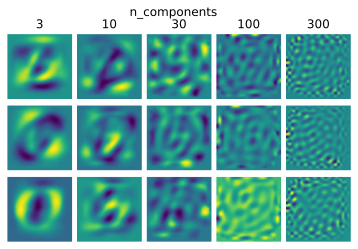

In [20]:
nrows = 3
ncols = len(n_components_list)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*1.25, nrows*1.25))

for i in range(nrows):
    for j in range(ncols):
        show(eig_vects[j][:, i], ax[i, j])

n_components_lst = n_components_list + ['original']
for j in range(ncols):
    ax[0, j].set_title(f'{n_components_lst[j]}')
fig.suptitle('n_components')

fig.subplots_adjust(wspace=0, hspace=0.1)